In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from urllib.request import Request, urlopen
from bs4 import BeautifulSoup
import seaborn as sns
import re

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Activation, Dropout
from tensorflow.python.keras.wrappers.scikit_learn import KerasRegressor
from tensorflow.python.keras.activations import relu, sigmoid, linear, exponential, softmax, tanh

from sklearn.svm import LinearSVC
from sklearn.exceptions import FitFailedWarning
import warnings

In [3]:
def loadData():
    data = pd.read_csv('https://www.dropbox.com/s/xn60mr1v40g09hb/major_data_normalized.csv?dl=1')
    x = (data[['2','3','4']])
    x = x.to_numpy()
    x = x.astype(float)
    y = (data[['0']])
    y = y.to_numpy()
    y = y.astype(float)
    y = np.reshape(y, (-1,1))

    return x,y

In [4]:
def plotData(x, y, xlabel, ylabel):
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.scatter([x], [y], marker = 'o')

In [5]:
x, y = loadData()

scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler()
print(scaler_x.fit(x))
xscale=scaler_x.transform(x)
print(scaler_y.fit(y))
yscale=scaler_y.transform(y)

X_train, X_test, y_train, y_test = train_test_split(xscale, yscale)

MinMaxScaler(copy=True, feature_range=(0, 1))
MinMaxScaler(copy=True, feature_range=(0, 1))


In [6]:
def create_model(layers, activation):
    model = Sequential()
    for i, nodes in enumerate(layers):
   
        if(i == 0):
            model.add(Dense(nodes, input_dim = 3, kernel_initializer = 'normal', activation=activation))
            model.add(Dropout(0.25))
        else:
            model.add(Dense(nodes, activation = activation))
      

    model.add(Dense(1, activation = 'linear'))

    model.compile(loss = 'mse', optimizer = 'adam', metrics = ['mse', 'mae'])

    return model

model_checked = KerasRegressor(build_fn = create_model, verbose = 0)
model_checked

In [10]:
from sklearn import svm

In [34]:
model = Sequential()
model.add(Dense(64, input_dim = 3, kernel_initializer = 'normal', activation = 'sigmoid'))
model.add(Dropout(0.25))
model.add(Dense(32, activation = 'sigmoid'))
model.add(Dense(16, activation  = 'sigmoid'))
model.add(Dense(1, activation = 'linear'))
model.compile(loss = 'mse', optimizer = 'adam', metrics = ['mse', 'mae'])

In [35]:
history = model.fit(X_train, y_train, verbose = 1, validation_split = 0.2, batch_size = 52, epochs = 10)

Train on 12 samples, validate on 4 samples
Epoch 1/10
12/12 [==============================] - 1s 118ms/sample - loss: 0.1166 - mse: 0.1166 - mae: 0.3084 - val_loss: 0.1401 - val_mse: 0.1401 - val_mae: 0.3551
Epoch 2/10
12/12 [==============================] - 0s 6ms/sample - loss: 0.1008 - mse: 0.1008 - mae: 0.2887 - val_loss: 0.1151 - val_mse: 0.1151 - val_mae: 0.3179
Epoch 3/10
12/12 [==============================] - 0s 6ms/sample - loss: 0.0953 - mse: 0.0953 - mae: 0.2728 - val_loss: 0.0933 - val_mse: 0.0933 - val_mae: 0.2815
Epoch 4/10
12/12 [==============================] - 0s 6ms/sample - loss: 0.0829 - mse: 0.0829 - mae: 0.2531 - val_loss: 0.0749 - val_mse: 0.0749 - val_mae: 0.2468
Epoch 5/10
12/12 [==============================] - 0s 6ms/sample - loss: 0.0809 - mse: 0.0809 - mae: 0.2371 - val_loss: 0.0599 - val_mse: 0.0599 - val_mae: 0.2142
Epoch 6/10
12/12 [==============================] - 0s 6ms/sample - loss: 0.0716 - mse: 0.0716 - mae: 0.2129 - val_loss: 0.0480 - val_m

dict_keys(['loss', 'mse', 'mae', 'val_loss', 'val_mse', 'val_mae'])


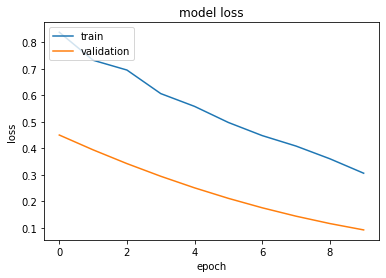

In [26]:
print(history.history.keys())
#Loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc = 'upper left')
plt.show()

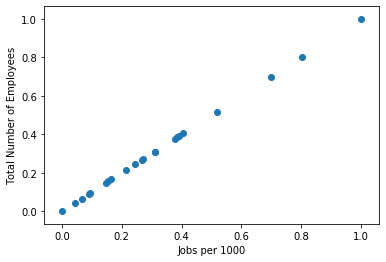

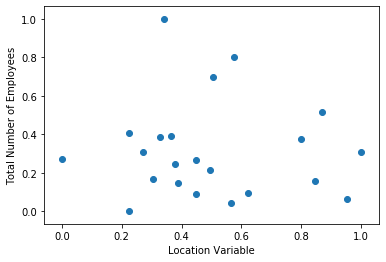

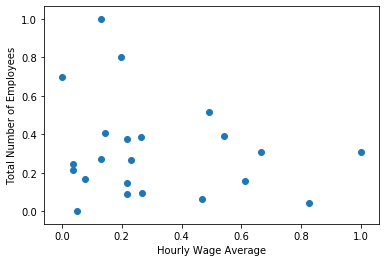

In [36]:
x, y = loadData()
plotData(x[:, 0], y, 'Jobs per 1000', 'Total Number of Employees')
plt.figure()
plotData(x[:, 1], y, 'Location Variable', 'Total Number of Employees')
plt.figure()
plotData(x[:, 2], y, 'Hourly Wage Average', 'Total Number of Employees')

1 [0.2931022]
2 [0.293144]
3 [0.29285792]
4 [0.29294178]
5 [0.29294148]
6 [0.29346836]
7 [0.2929357]
8 [0.29361886]
9 [0.29331505]
10 [0.29339847]
11 [0.29368895]
12 [0.293527]
13 [0.29380894]
14 [0.29361078]
15 [0.29369986]
16 [0.29365772]
17 [0.29393405]
18 [0.29370475]
19 [0.29333776]
20 [0.29352126]
21 [0.2938934]
22 [0.29378468]


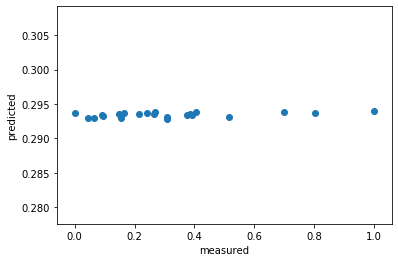

In [39]:
x, y = loadData()
x = np.expand_dims(x, axis = 1)
predictions = []
for i in range(len(x)):
    x[i]= scaler_x.transform(x[i].reshape(1,-1))
    ynew= model.predict(x[i])
    #invert normalize
    ynew = scaler_y.inverse_transform(ynew.reshape(1,-1))
    x[i] = scaler_x.inverse_transform(x[i])
    predictions.append(ynew[0])
##print("X=%s, Predicted=%s" % (Xnew[0], ynew[0]))
plt.figure()
plotData(y, predictions, 'measured', 'predicted' )
for i in range(len(predictions)):
    print(i+1, predictions[i])

In [43]:
pop = float(input("Enter the jobs per 1000 people normalized: "))
dense = float(input("Enter the location quotient normalized: "))
days = float(input("Enter the average hourly wage normalzied: "))
x_spec = [[pop, dense, days]]
x_spec = scaler_x.transform(x_spec)
y_hat = model.predict(x_spec)
y_hat = scaler_y.inverse_transform(y_hat.reshape(-1,1))
x_spec = scaler_x.inverse_transform(x_spec)
print('X: ',x_spec[0], 'Predicted = ', y_hat[0])    #Is there a way to un normalize data quickly?

Enter the jobs per 1000 people normalized:  .4
Enter the location quotient normalized:  .9
Enter the average hourly wage normalzied:  .6


X:  [0.4 0.9 0.6] Predicted =  [0.29300436]


### Non normalized input data

In [55]:
def loadData1():
    data = pd.read_csv('https://www.dropbox.com/s/fotppg0aakiwa0v/major_groups_unnormalized.csv?dl=1')
    x = (data[['JOBS_1000','LOC_Q','H_MEAN']])
    x = x.to_numpy()
    x = x.astype(float)
    y = (data[['TOT_EMP']])
    y = y.to_numpy()
    y = y.astype(float)
    y = np.reshape(y, (-1,1))

    return x,y

In [56]:
x, y = loadData1()

scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler()
print(scaler_x.fit(x))
xscale=scaler_x.transform(x)
print(scaler_y.fit(y))
yscale=scaler_y.transform(y)

X_train, X_test, y_train, y_test = train_test_split(xscale, yscale)

MinMaxScaler(copy=True, feature_range=(0, 1))
MinMaxScaler(copy=True, feature_range=(0, 1))


In [57]:
model = Sequential()
model.add(Dense(64, input_dim = 3, kernel_initializer = 'normal', activation = 'sigmoid'))
model.add(Dropout(0.25))
model.add(Dense(32, activation = 'sigmoid'))
model.add(Dense(16, activation  = 'sigmoid'))
model.add(Dense(1, activation = 'linear'))
model.compile(loss = 'mse', optimizer = 'adam', metrics = ['mse', 'mae'])

In [58]:
history = model.fit(X_train, y_train, verbose = 1, validation_split = 0.2, batch_size = 52, epochs = 10)

Train on 12 samples, validate on 4 samples
Epoch 1/10
12/12 [==============================] - 1s 118ms/sample - loss: 1.3904 - mse: 1.3904 - mae: 1.1481 - val_loss: 1.7199 - val_mse: 1.7199 - val_mae: 1.2894
Epoch 2/10
12/12 [==============================] - 0s 6ms/sample - loss: 1.2415 - mse: 1.2415 - mae: 1.0828 - val_loss: 1.6073 - val_mse: 1.6073 - val_mae: 1.2450
Epoch 3/10
12/12 [==============================] - 0s 6ms/sample - loss: 1.1859 - mse: 1.1859 - mae: 1.0586 - val_loss: 1.4991 - val_mse: 1.4991 - val_mae: 1.2008
Epoch 4/10
12/12 [==============================] - 0s 7ms/sample - loss: 1.0946 - mse: 1.0946 - mae: 1.0131 - val_loss: 1.3953 - val_mse: 1.3953 - val_mae: 1.1568
Epoch 5/10
12/12 [==============================] - 0s 7ms/sample - loss: 0.9628 - mse: 0.9628 - mae: 0.9483 - val_loss: 1.2963 - val_mse: 1.2963 - val_mae: 1.1131
Epoch 6/10
12/12 [==============================] - 0s 7ms/sample - loss: 0.9030 - mse: 0.9030 - mae: 0.9135 - val_loss: 1.2018 - val_m

dict_keys(['loss', 'mse', 'mae', 'val_loss', 'val_mse', 'val_mae'])


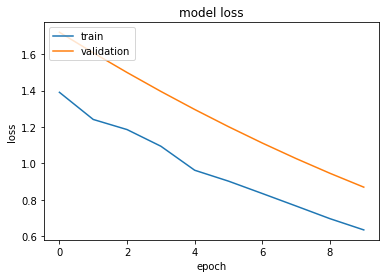

In [59]:
print(history.history.keys())
#Loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc = 'upper left')
plt.show();

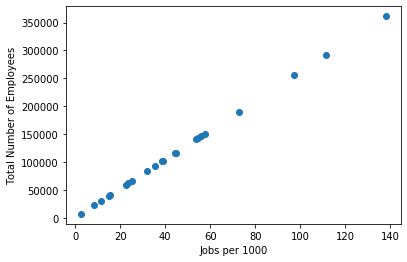

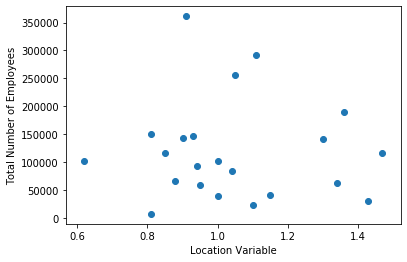

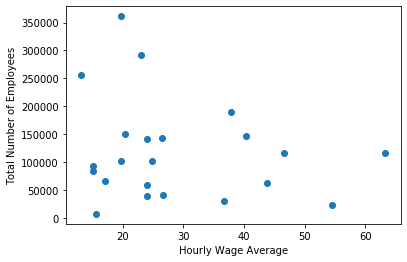

In [60]:
x, y = loadData1()
plotData(x[:, 0], y, 'Jobs per 1000', 'Total Number of Employees')
plt.figure()
plotData(x[:, 1], y, 'Location Variable', 'Total Number of Employees')
plt.figure()
plotData(x[:, 2], y, 'Hourly Wage Average', 'Total Number of Employees')

1 [-153659.12]
2 [-152885.31]
3 [-152953.92]
4 [-153246.5]
5 [-153228.31]
6 [-153693.02]
7 [-153623.88]
8 [-153532.16]
9 [-153519.25]
10 [-153489.5]
11 [-153760.23]
12 [-153697.88]
13 [-153067.06]
14 [-153532.34]
15 [-153619.11]
16 [-152902.28]
17 [-152947.05]
18 [-153996.02]
19 [-153084.6]
20 [-153528.69]
21 [-153958.64]
22 [-153614.16]


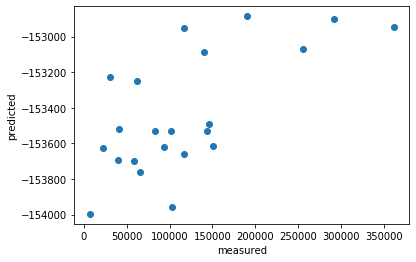

In [61]:
x, y = loadData1()
x = np.expand_dims(x, axis = 1)
predictions = []
for i in range(len(x)):
    x[i]= scaler_x.transform(x[i].reshape(1,-1))
    ynew= model.predict(x[i])
    #invert normalize
    ynew = scaler_y.inverse_transform(ynew.reshape(1,-1))
    x[i] = scaler_x.inverse_transform(x[i])
    predictions.append(ynew[0])
##print("X=%s, Predicted=%s" % (Xnew[0], ynew[0]))
plt.figure()
plotData(y, predictions, 'measured', 'predicted' )
for i in range(len(predictions)):
    print(i+1, predictions[i])

In [63]:
pop = float(input("Enter the jobs per 1000 people normalized: "))
dense = float(input("Enter the location quotient normalized: "))
days = float(input("Enter the average hourly wage normalzied: "))
x_spec = [[pop, dense, days]]
x_spec = scaler_x.transform(x_spec)
y_hat = model.predict(x_spec)
y_hat = scaler_y.inverse_transform(y_hat.reshape(-1,1))
x_spec = scaler_x.inverse_transform(x_spec)
print('X: ',x_spec[0], 'Predicted = ', y_hat[0])    #Is there a way to un normalize data quickly?

Enter the jobs per 1000 people normalized:  44.3
Enter the location quotient normalized:  .85
Enter the average hourly wage normalzied:  63.35


X:  [44.3   0.85 63.35] Predicted =  [-153660.94]
